(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'Preliminary'))

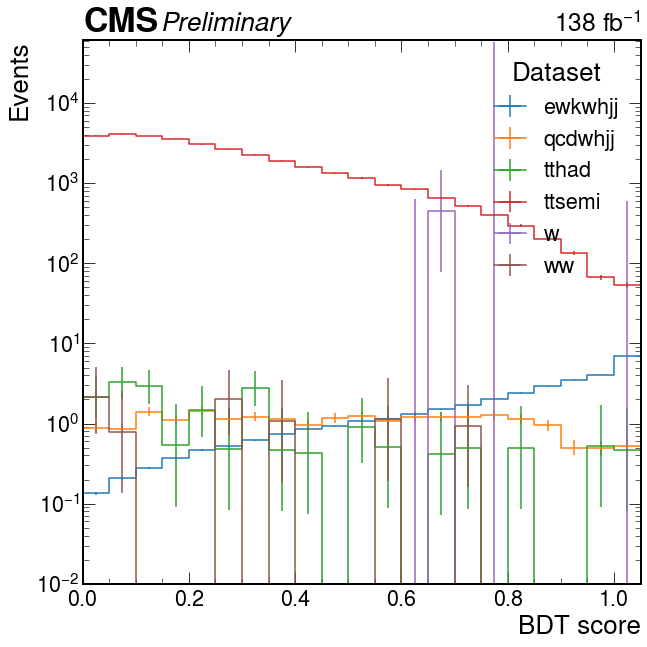

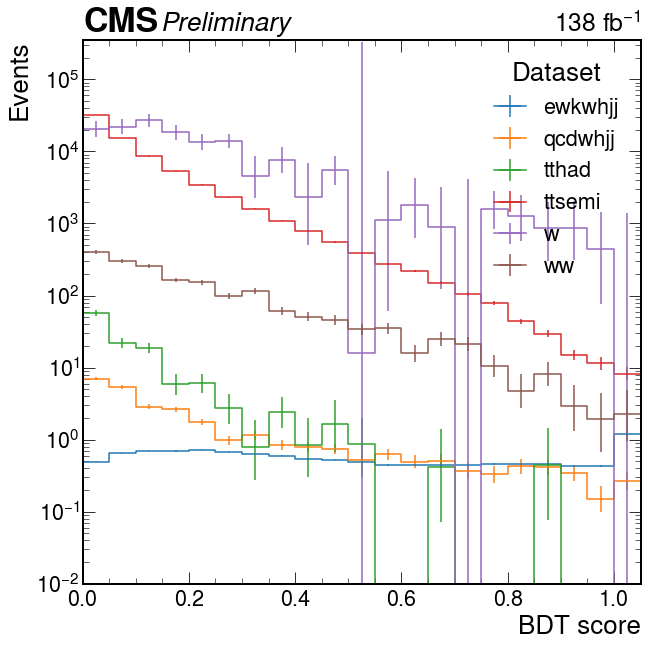

In [6]:
from math import sqrt
from coffea.util import load
from coffea import hist
import matplotlib.pyplot as plt
import mplhep as hep

f = load("outfile_2016")

#lumi=35.9
lumi=138

for k in f.keys():
    if not hasattr(f[k],"scale"):
        continue  

#    f[k].scale({"TTBarSemi" : lumi*1000*365.4/f["sumw"]["TTBarSemi"],'W':lumi*1000*61526.7/f["sumw"]["W"],'TTBarHad':lumi*1000*377.96/f["sumw"]["TTBarHad"],"WW" : lumi*1000*64.3/f["sumw"]["WW"],'Signal':lumi*1000*0.0184/f["sumw"]["Signal"]},axis="dataset")
        
    f[k].scale({"qcdwhjj" : lumi*1000*0.08968/f["sumw"]["qcdwhjj"],'w':lumi*1000*61526.7/f["sumw"]["w"],'tthad':lumi*1000*377.96/f["sumw"]["tthad"],"ttsemi" : lumi*1000*365.4/f["sumw"]["ttsemi"],'ewkwhjj':lumi*1000*0.0184/f["sumw"]["ewkwhjj"]},axis="dataset")
    
backgrounds = [["ttsemi", ["ttsemi"]], ["qcdwhjj", ["qcdwhjj"]]]

nuisances = ["pileup","prefire","muonidsf","muonisosf","muonhltsf","electronidsf","JES","JER"] 
    
plt.style.use(hep.style.CMS)                                                                                                                                          

nbins=5

for i in range(1,nbins+1):

    dcard = open('ewkwhjj_dcard_bin{}.txt'.format(i),'w')

    print('imax 1 number of channels',file=dcard)
    print('jmax * number of background',file=dcard)
    print('kmax * number of nuisance parameters',file=dcard)

    print('Observation 0',file=dcard)
    dcard.write('bin')
    dcard.write(' bin1')
    for j in range(len(backgrounds)):
        dcard.write(' bin1')
    dcard.write('\n')

    dcard.write('process')
    dcard.write(' signal')
    for j in range(len(backgrounds)):
        dcard.write(' {}'.format(backgrounds[j][0]))
    dcard.write('\n')
    
    dcard.write('process')
    dcard.write(' 0')
    for j in range(len(backgrounds)):
        dcard.write(' {}'.format(j+1))
    dcard.write('\n')
    
    dcard.write('rate')
    signal_values=f['sel3_bdtscore_binning1']['ewkwhjj'].values(sumw2=True,overflow='over')[('ewkwhjj',)]
    dcard.write(' {}'.format(signal_values[0][-i]))
    for j in range(len(backgrounds)):
        background = backgrounds[j][1][0]
        background_values=f['sel3_bdtscore_binning1'][background].values(sumw2=True,overflow='over')[(background,)]
        dcard.write(" {}".format(background_values[0][-i]))
    dcard.write('\n')
    
    dcard.write('lumi_13TeV_2016 lnN 1.01')
    for j in range(len(backgrounds)):
        dcard.write(' 1.01')
    dcard.write('\n')
    
    dcard.write('lumi_13TeV_correlated lnN 1.006')
    for j in range(len(backgrounds)):
        dcard.write(' 1.006')
    dcard.write('\n')
    
    dcard.write('mcstatsignalbin{} lnN {}'.format(i,1+sqrt(signal_values[1][-i])/signal_values[0][-i]))
    for j in range(len(backgrounds)):
        dcard.write(' -')
    dcard.write('\n')
    
    for j in range(len(backgrounds)):
        background = backgrounds[j][1][0]
        background_values=f['sel3_bdtscore_binning1'][background].values(sumw2=True,overflow='over')[(background,)]
        dcard.write('mcstat{}bin{} lnN'.format(background,i))
        dcard.write(' -')
        for k in range(len(backgrounds)):
            if background == backgrounds[k][1][0]:
                dcard.write(' {}'.format(1+sqrt(background_values[1][-i])/background_values[0][-i]))
            else:
                dcard.write(' -')
        dcard.write('\n')
    
    for nuisance in nuisances:
    
        dcard.write('{} lnN'.format(nuisance))
        
        signal_nuisanceUp_values=f['sel3_bdtscore_binning1_{}Up'.format(nuisance)]["ewkwhjj"].values(overflow="over")[("ewkwhjj",)]
    
        dcard.write(' {}'.format(signal_nuisanceUp_values[-i]/signal_values[0][-i]))
    
        for j in range(len(backgrounds)):
            background = backgrounds[j][1][0]
            background_values=f['sel3_bdtscore_binning1'][background].values(sumw2=True,overflow='over')[(background,)]
            background_nuisanceUp_values=f['sel3_bdtscore_binning1_{}Up'.format(nuisance)][background].values(overflow='over')[(background,)]
            dcard.write(' {}'.format(background_nuisanceUp_values[-i]/background_values[0][-i]))

        dcard.write('\n')
    
    dcard.close()

nbins_merged = 2    
    
for i in range(1,nbins_merged+1):

    dcard_merged = open("ewkwhjj_merged_dcard_bin{}.txt".format(i),'w')

    print("imax 1 number of channels",file=dcard_merged)
    print("jmax * number of background",file=dcard_merged)
    print("kmax * number of nuisance parameters",file=dcard_merged)

    print("Observation 0",file=dcard_merged)
    dcard_merged.write("bin")
    dcard_merged.write(" bin1")
    dcard_merged.write(" bin1")
    dcard_merged.write('\n')

    dcard_merged.write("process")
    dcard_merged.write(" Signal")
    dcard_merged.write(" TTBarSemi")
    dcard_merged.write('\n')
    
    dcard_merged.write("process")
    dcard_merged.write(" 0")
    dcard_merged.write(" 1")
    dcard_merged.write('\n')
    
    dcard_merged.write('rate')
    signal_values=f["sel9_bdtscore_binning1"]["ewkwhjj"].values(sumw2=True,overflow="over")[("ewkwhjj",)]
    ttbarsemi_values=f["sel9_bdtscore_binning1"]["ttsemi"].values(sumw2=True,overflow="over")[("ttsemi",)]
    dcard_merged.write(" {}".format(signal_values[0][-i]))
    dcard_merged.write(" {}".format(ttbarsemi_values[0][-i]))
    dcard_merged.write('\n')
    
    dcard_merged.write('mcstatsignalbin{} lnN {} -'.format(i,1+sqrt(signal_values[1][-i])/signal_values[0][-i]))
    dcard_merged.write('\n')
    dcard_merged.write('mcstatttbarsemibin{} lnN - {}'.format(i,1+sqrt(ttbarsemi_values[1][-i])/ttbarsemi_values[0][-i]))
    dcard_merged.write('\n')
    
    dcard_merged.close()
    
bdtscorefig1, ax = plt.subplots()

hist.plot1d(f["sel3_bdtscore_binning1"].remove(["Data"],"dataset"),overflow="over")

ax.set_xlabel('BDT score')
ax.set_ylim(0.01, None)
ax.set_yscale('log')
                                                                                                                                                                         
hep.cms.lumitext("{} fb$^{{-1}}$".format(lumi))
hep.cms.text("Preliminary")

sel9bdtscorefig1, ax = plt.subplots()

hist.plot1d(f["sel9_bdtscore_binning1"].remove(["Data"],"dataset"),overflow="over")

ax.set_xlabel('BDT score')
ax.set_ylim(0.01, None)
ax.set_yscale('log')
                                                                                                                                                                         
hep.cms.lumitext("{} fb$^{{-1}}$".format(lumi))
hep.cms.text("Preliminary")